<a href="https://colab.research.google.com/github/versatilebreed/Coursera-test/blob/gh-pages/Stock_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To predict the closing stock price for past 60 days for appl.inc 

In [ ]:
#importing libraries 

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers  import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.800995
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.322155
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,38.073456


In [ ]:
df.shape

(1760, 6)

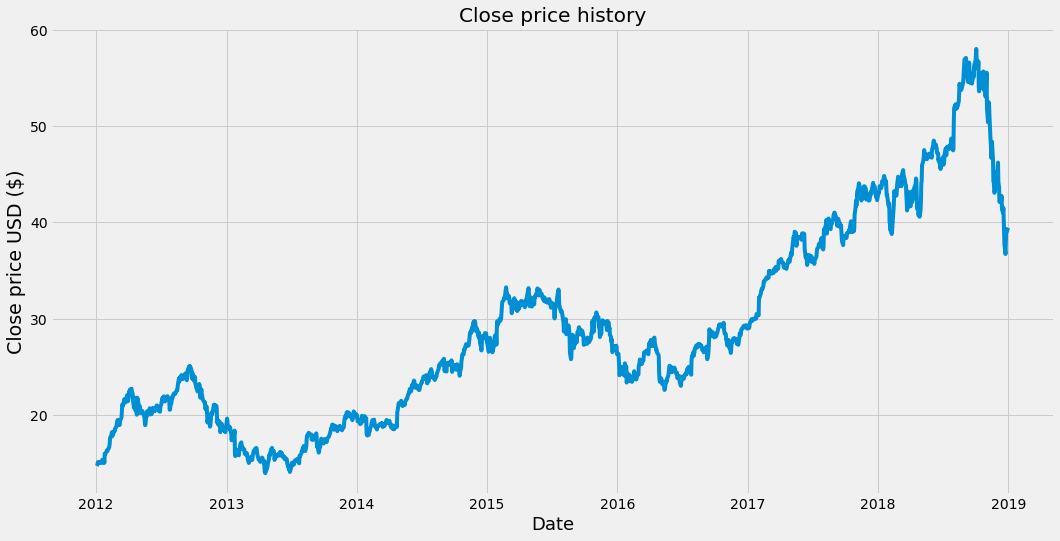

In [ ]:
#To visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=19)
plt.show()

In [ ]:
#creating a new dataframe with the close column only 
data = df.filter(['Close'])
#Converting the dataframe to numpy array
dataset = data.values
#Geting the number of rows to train the model 
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len


1408

In [ ]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.56932147],
       [0.56977531],
       [0.57834128]])

In [ ]:
#Creation of training dataset 
training_data = scaled_data[0:training_data_len]
#Spliting the dataset into x_train & y_train datasets
x_train = []
y_train = []

for i in range(60, len(training_data)):
  x_train.append(training_data[i-60:i, 0])
  y_train.append(training_data[i, 0]) 

  if i<= 61:
    print(x_train) 
    print(y_train)
    print()

[array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
       0.0312652 , 0.03016305, 0.02412556, 0.02988751, 0.02421471,
       0.04548769, 0.04384259, 0.04599015, 0.05063372, 0.05344579,
       0.05321078, 0.05234367, 0.05603909, 0.05951568, 0.06345425,
       0.06981588, 0.08317935, 0.08338195, 0.09082143, 0.09638074,
       0.08682617, 0.09050536, 0.09043243, 0.10074882, 0.09928197,
       0.1019968 , 0.1068754 , 0.10959027, 0.11741061, 0.12310769,
       0.1247528 , 0.12532821, 0.11558723, 0.11323704, 0.11358553,
       0.12274305, 0.12532011, 0.13085515, 0.14390255, 0.16130993,
       0.15805211, 0.15806021, 0.17064572, 0.17458428, 0.17178026,
       0.16921943, 0.16655321, 0.17541084, 0.18148887, 0.18403351])]
[0.17774480420636363]

[array([0.01677525, 0.01856622, 0.02228596, 0.02582741, 0.02528444,
       0.02650814, 0.02594896, 0.0250089 , 0.02372846, 0.02769133,
       0.0312652 , 0.03016305, 0.02

In [ ]:
#convert the x_train and y_train into np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(1348, 60, 1)

In [ ]:
#Building the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#FOR Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1348/1348 [==============================] - 31s 21ms/step - loss: 0.0029


In [ ]:
#Creating the testing dataset
#Create a new array containing scaled values from index 1348 to 2005
test_data = scaled_data[training_data_len - 60: , :]
#Creating the data x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)): 
 x_test.append(test_data[i-60:i, 0])



In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
 x_test.shape

(352, 60, 1)

In [ ]:
#Predict the price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Root mean square error
rmse = np.sqrt( np.mean(predictions - y_test )**2 )
rmse

0.06677009842612526

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'lower right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


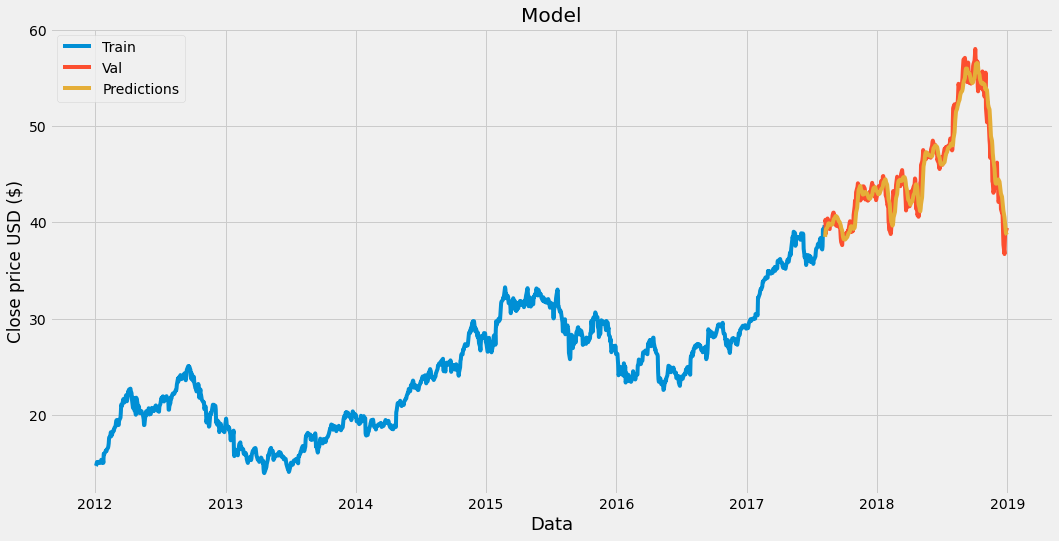

In [ ]:
#PLOT THE DATA 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right ')
plt.show()

In [ ]:
 valid

,Close,Predictions
Date,,
2017-08-08,40.020000,38.491192
2017-08-09,40.264999,38.816357
2017-08-10,38.830002,39.162537
2017-08-11,39.369999,39.327179
2017-08-14,39.962502,39.433952
...,...,...
2018-12-24,36.707500,40.518929
2018-12-26,39.292500,39.726501
2018-12-27,39.037498,39.217686


In [ ]:
 #Get the data qoute 
 apple_qoute = web.DataReader('AAPL',data_source='yahoo', start ='2012-01-01', end='2018-12-02')
 #creating new dataframe
 new_df = apple_qoute.filter(['Close'])
 #get the last 60 days value and then convert into numpy array
 last_60_days = new_df[-60:].values
 #scale the  data between 0 and 1
 last_60_days_scaled = scaler.transform(last_60_days)
 #create and empty list 
 X_test = []
#APPEND THE past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data 

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Geting the predicted price 
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[44.042282]]


In [ ]:
apple_qoute2 = web.DataReader('AAPL',data_source='yahoo', start ='2018-01-01', end='2018-01-02')
print(apple_qoute2['Close'])

Date
2018-01-02    43.064999
Name: Close, dtype: float64
